## Import the wrapper and instantiate it with some untrained models

In [1]:
from analysis import ModelAnalysis
from joblib import dump, load
import torch
from models import SuicideRegressorDrop


## Train the models or load the pretrained stored models

In [2]:
# load nn model
nn_model = SuicideRegressorDrop(in_features=9)
PATH = "torch_models/bn_do.pickle"
saved_state_dict = torch.load(PATH).state_dict()
nn_model.load_state_dict(saved_state_dict)


<All keys matched successfully>

In [3]:
models = {
    'LinearRegression': load('models/linear/linear_default.joblib'),
    'DecisionTreeRegressor': load('models/tree/tree_md_18_ms_4.joblib'),
    # 'MLPRegressor': MLPRegressor(
    #         hidden_layer_sizes=[512, 256, 64, 8],
    #         max_iter=3000,
    #         activation='relu'),
    # 'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': load('models/forest/forest_ne_30_md_18_ms_2.joblib'),
    'NN': nn_model,
    # 'KNeighborsRegressor': KNeighborsRegressor()
}

model_analysis = ModelAnalysis(models=models)
# train the models
# model_analysis.train()

# here we just load the pretrained ones
# model_analysis.load_models()


In [4]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict(split='train')
_ = model_analysis.predict(split='val')
_ = model_analysis.predict(split='test')


In [5]:
model_analysis.predictions['test'].keys()

dict_keys(['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'NN'])

## Evaluate the predictions using different metrics

In [6]:
# test other metrics
from sklearn.metrics import (max_error, mean_absolute_error,
                             mean_squared_error, median_absolute_error, r2_score)
from utils import root_mean_squared_error

for metric in [mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error]:
    print(f"{metric.__name__:#^32}")
    _ = model_analysis.evaluate(metric=metric, verbose=True)  # default split is test
    _ = model_analysis.evaluate(metric=metric, split='train', verbose=True)
    print()


#######mean_squared_error#######
LinearRegression: 235.89206582707516
DecisionTreeRegressor: 35.558768912493015
RandomForestRegressor: 10.46180724352948
NN: 6.27948966195838
LinearRegression: 190.69804418733128
DecisionTreeRegressor: 43.2324536894825
RandomForestRegressor: 16.99388061609787
NN: 10.252234139358809

####root_mean_squared_error#####
LinearRegression: 15.358778135876406
DecisionTreeRegressor: 5.9631173820823795
RandomForestRegressor: 3.234471710114262
NN: 2.505890991635187
LinearRegression: 13.809346262127374
DecisionTreeRegressor: 6.575139062368377
RandomForestRegressor: 4.122363474525005
NN: 3.2019110136540037

############r2_score############
LinearRegression: 0.3307314959834141
DecisionTreeRegressor: 0.899113333925434
RandomForestRegressor: 0.9703179585178604
NN: 0.9821839507941427
LinearRegression: 0.3354862426039661
DecisionTreeRegressor: 0.8493505249879402
RandomForestRegressor: 0.9407824683831076
NN: 0.9642746696292451

######mean_absolute_error#######
LinearRegres

## Visualizations

### Visualize the predicitons

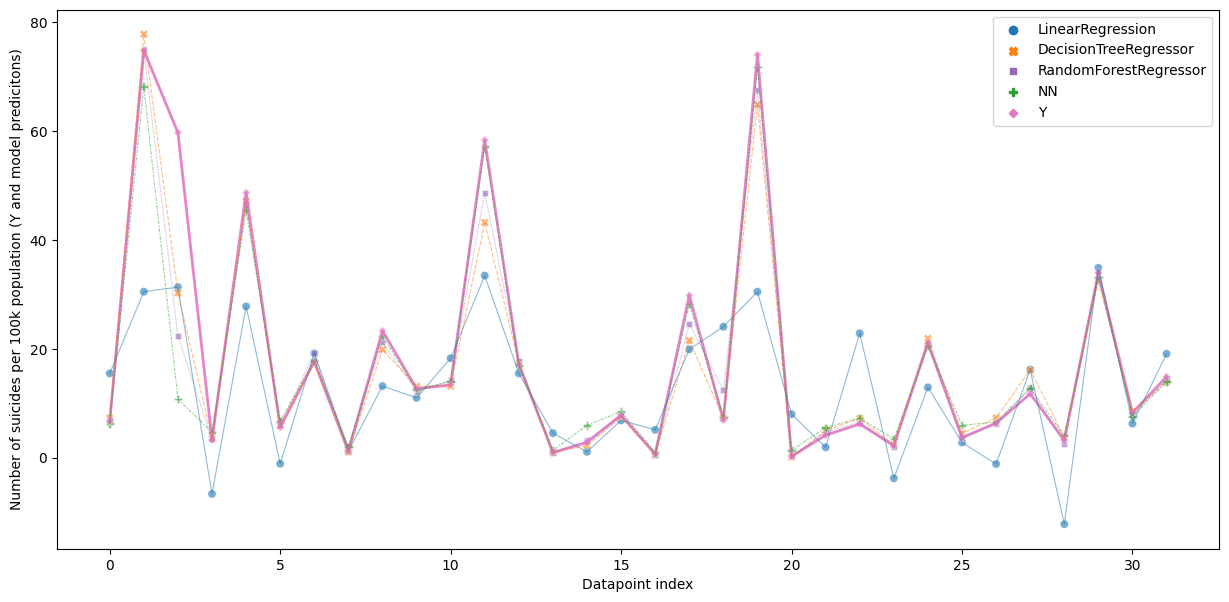

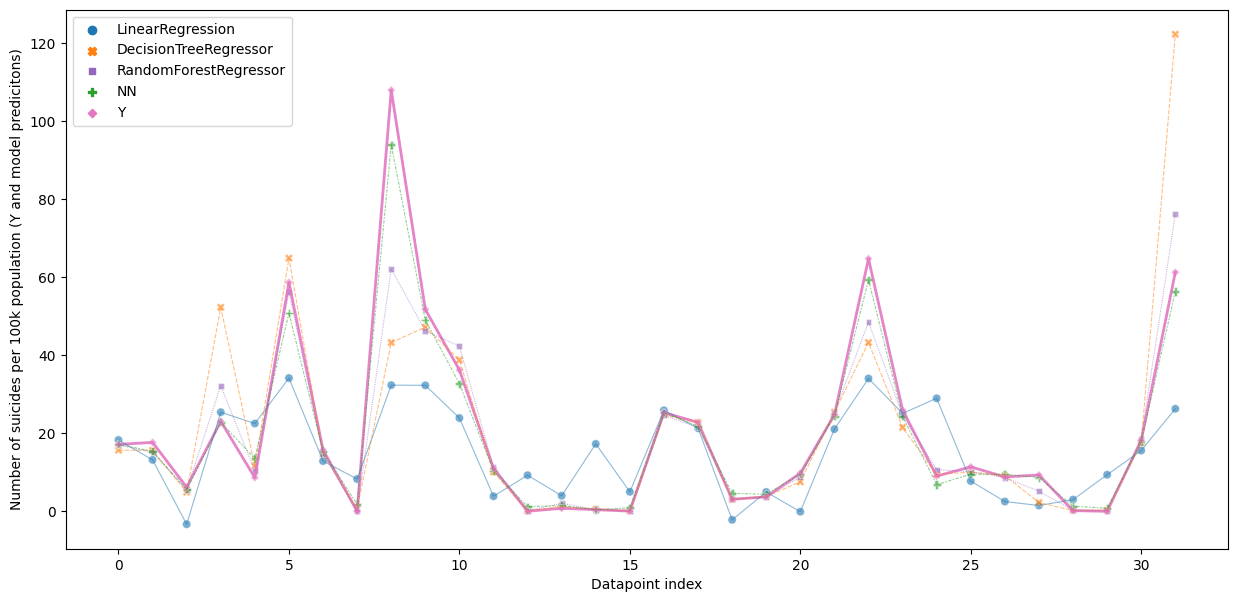

In [7]:
model_analysis.visualize_predictions(split="val",palette=ModelAnalysis.PALETTE)
model_analysis.visualize_predictions(sample_range=(100,132), split='val',palette=ModelAnalysis.PALETTE)

### Visualize the accuracies based on different metrics

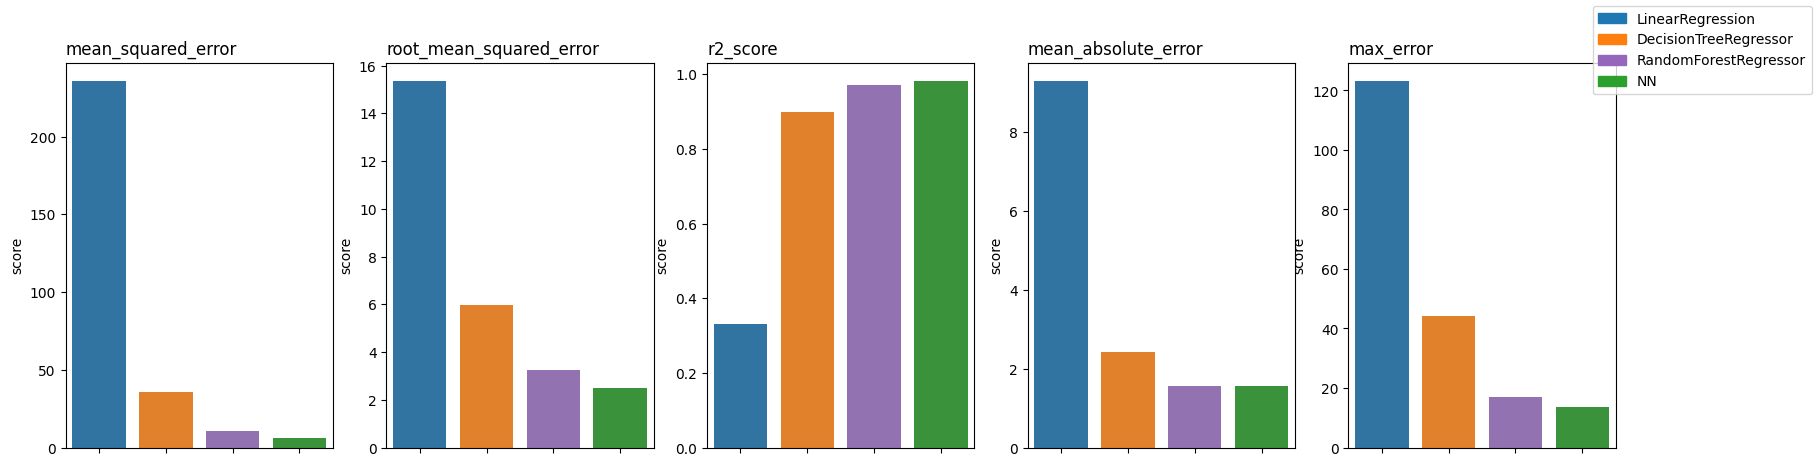

In [8]:
# # testing
# import math
# import pandas as pd
# import matplotlib.pylab as plt
# import seaborn as sns
# import matplotlib.patches as mpatches


# metrics = ModelAnalysis.ALL_METRICS
# num_metrcis = len(metrics)
# ncols = 5
# nrows = math.ceil(num_metrcis / ncols)
# fig, ax = plt.subplots(figsize=(20, 5), nrows=nrows, ncols=ncols)

# for col in range(ncols):
#     for row in range(nrows):
#         index = row*ncols + col
#         if index >= num_metrcis:
#             break
#         metric = metrics[index]
#         scores, min_score = model_analysis.evaluate(
#             metric=metric, split='test')
#         df = pd.DataFrame({
#             'model': model_analysis.models.keys(),
#             'score': scores.values(),
#         })
#         cax = cax = ax[col]  # ax[row][col]
#         sns.barplot(df, x='model', y='score', ax=cax,
#                     palette=ModelAnalysis.PALETTE)
#         cax.set_title(metric.__name__, loc='left')
#         cax.set_xlabel(None)
#         cax.set_xticklabels([])

# patches = [mpatches.Patch(
#     color=model_analysis.PALETTE[m],
#     label=m)
#     for m in model_analysis.models.keys()]
# fig.legend(handles=patches)


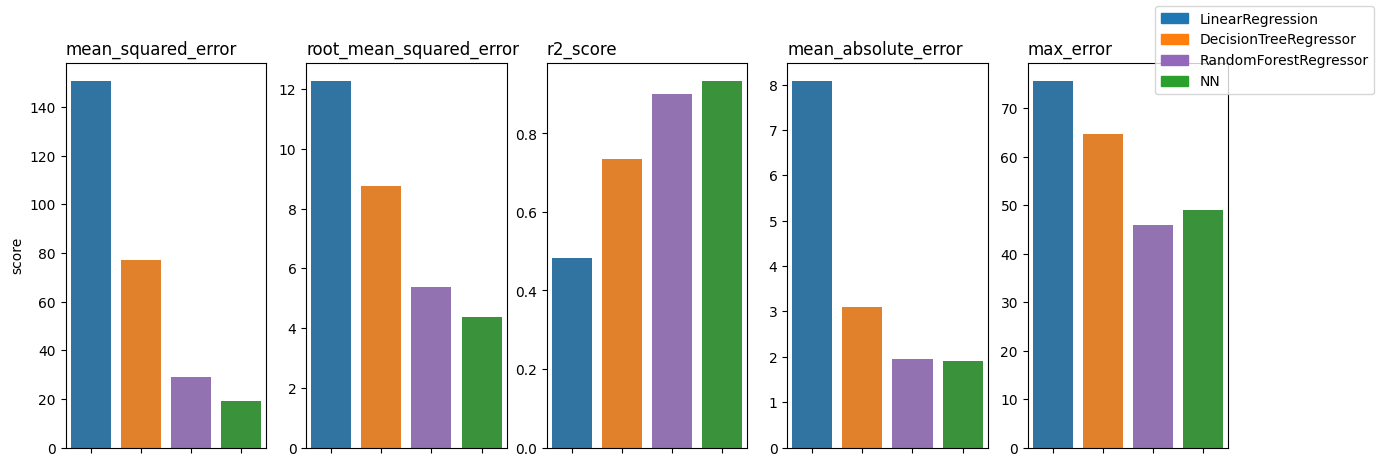

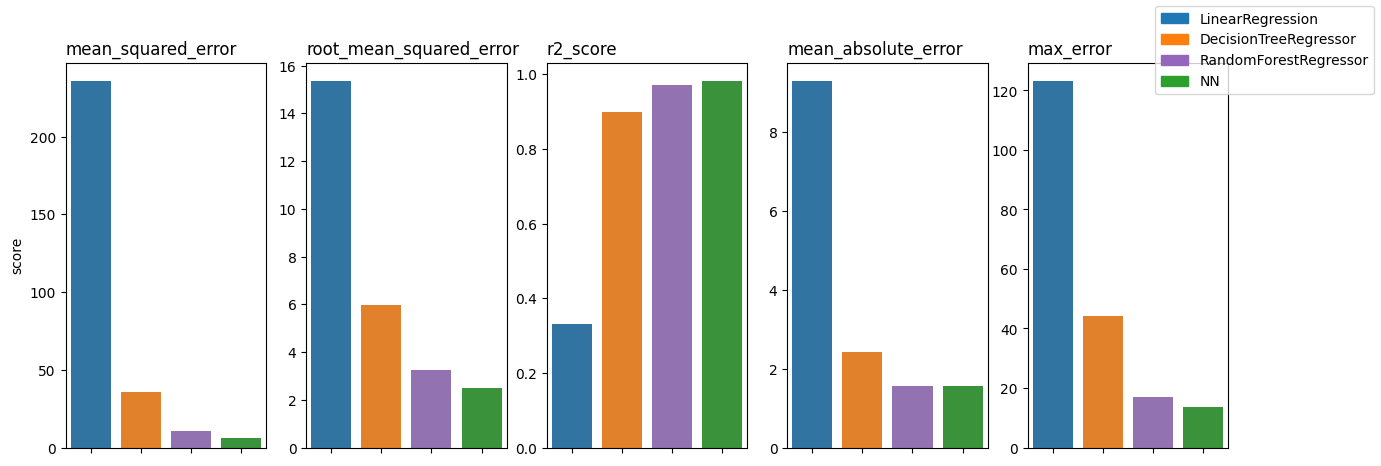

In [9]:
model_analysis.visualize_metrics(split='val',palette=ModelAnalysis.PALETTE, ncols=5)
model_analysis.visualize_metrics(split='test',palette=ModelAnalysis.PALETTE, ncols=5)

## We can save the models to a file to reuse them later without having to retrain them

In [10]:
# model_analysis.save_models()